In [10]:
import random

def shuffle_deck(m):
    # Create a shuffled deck of number from 1 to M.
    deck = list(range(1,m+1))
    random.shuffle(deck)
    return deck

def play_game(m):
    #Play the card matching game.
    deck1 = shuffle_deck(m)
    deck2 = shuffle_deck(m)
    score = 0

    while deck1 and deck2:
        card1 = deck1.pop()
        card2 = deck2.pop()
        if card1 == card2:
            score += 1

    return score

# Test: Play the game once and print the score
m = 10 # Pick the size of deck you want
print("Score:", play_game(m))


def play_games(m, n):
    # Play the card matching game n times and return the scores.
    scores = [play_game(m) for _ in range(n)]
    return scores



Score: 1


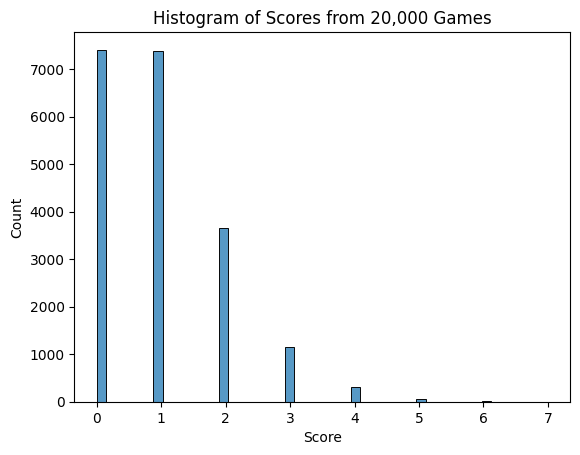

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Play the game many times
M = 10
N = 20000


scores = play_games(M, N)

# Create a histogram of the scores
sns.histplot(scores, kde=False)
plt.title(f'Histogram of Scores from {format(N, ",")} Games')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


In [16]:
import pandas as pd

# Convert the scores to a pandas Series
scores_series = pd.Series(scores)

# Calculate the frequency of each score
frequency = scores_series.value_counts()

# Calculate the percentage of each score
percentage = scores_series.value_counts(normalize=True) * 100

# Create a DataFrame from the frequency and percentage
frequency_table = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})

# Print the frequency table
print(frequency_table)


   Frequency  Percentage
0       7409      37.045
1       7386      36.930
2       3666      18.330
3       1162       5.810
4        300       1.500
5         66       0.330
6          8       0.040
7          3       0.015


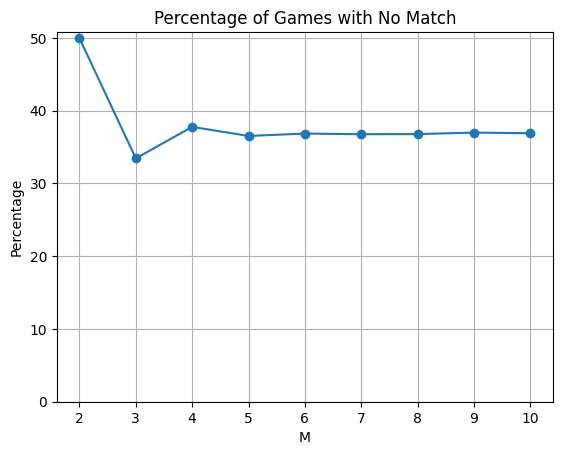

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the values of M
#M_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
M_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize a list to store the percentages
percentages = []

# For each value of M
for M in M_values:
    # Play the game many times
    N = 100000
    scores = play_games(M, N)

    # Convert the scores to a pandas Series
    scores_series = pd.Series(scores)

    # Calculate the frequency of each score
    frequency = scores_series.value_counts()

    # Calculate the percentage of each score
    percentage = scores_series.value_counts(normalize=True) * 100

    # Append the percentage for score 0 to the list
    percentages.append(percentage.get(0, 0))

# Plot the percentages
plt.plot(M_values, percentages, marker='o')
plt.title('Percentage of Games with No Match')
plt.xlabel('M')
plt.ylabel('Percentage')
plt.ylim(bottom=0)  # Set the starting point of y-axis to 0
plt.grid(True)
plt.show()
